

# Project: Investigation of The IMDB 10,000 Movies Data Set 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this data set we will be exploring the IMDB 10,000 movies list collected from the movie data base (IMDB) including user ratings, popularity, release date, cast, budget, revenues and some more features.


> We will investigate and manipulate our dataset with visualization by doing some Uni/BIvariate Analysis to get some general insights such as;
> * Which movie genres are more profitable?
> * How is the production rate for the low, medium and high budget movies over the years?
> * Which Production companies have prdoduced the most profitable movies?
> * What is the best release month for most profitable movies?
> * Which movie era had the highst average ratings? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_raw= pd.read_csv('tmdb-movies.csv')
df_raw.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **Findings** Movies list is not ordered based of average ratings or popularity. 

In [3]:
df_raw.shape

(10866, 21)

In [4]:
df_raw.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> **Findings** 
(1) columns of "cast", " homepage", "keywords" , "production_companies", "imdb_id" has missing data  
(2) release_date data type is an object not a datetime

In [6]:
df_raw.nunique()   

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
df_raw.genres.nunique() 

2039

In [8]:
df_raw.genres.value_counts()

Comedy                                    712
Drama                                     712
Documentary                               312
Drama|Romance                             289
Comedy|Drama                              280
                                         ... 
Family|Fantasy|Drama                        1
Comedy|Fantasy|Romance|TV Movie             1
Mystery|Drama|Crime|Thriller                1
Adventure|Comedy|Crime|Mystery|Romance      1
Adventure|Action|Comedy|Foreign             1
Name: genres, Length: 2039, dtype: int64

> **Findings** Multiple classifiers of genres make it difficult to classify each movie genre

In [9]:
df_raw.production_companies.nunique()

7445

In [10]:
df_raw.production_companies.value_counts()

Paramount Pictures                                                                                    156
Universal Pictures                                                                                    133
Warner Bros.                                                                                           84
Walt Disney Pictures                                                                                   76
Columbia Pictures                                                                                      72
                                                                                                     ... 
Miramax Films|Lions Gate Films|Artisan Entertainment|Lawrence Bender Productions|Havana Nights LLC      1
Fox Searchlight Pictures|Room 9 Entertainment                                                           1
Graffiti Productions                                                                                    1
Raven Banner Entertainment|De Angeles Films   

> **Findings** Collborative production between production companies is common on production industry 

In [11]:
df_raw.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
df_raw.duplicated().value_counts()

False    10865
True         1
dtype: int64

> **Findings** one duplicated raw was found


### Data Cleaning 

#### Based on our previous findings, these cleaning process is performed as below;

In [13]:
df= df_raw.copy()

 ##### **Issue 1** 
 one duplicated raw was found
> Remove all duplicated rows

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    10865
dtype: int64

 ##### **Issue 2** 
Undesirable columns as; 'imdb_id', 'tagline', 'keywords', 'overview', 'budget', 'revenue' for our analysis will affect our analysis readability
> Drop all these columns from our data set for readability

In [15]:
df.drop(columns=['id','imdb_id', 'tagline', 'keywords', 'overview', 'budget', 'revenue'], inplace=True)


 ##### **Issue 3** 
N/As and Zeros values
> *for 'homepage' columns:*
   Nan values most likely idndicate that this movies has no official website.
we will fill Nan value with 'No official homepage'

In [16]:
df['homepage'].fillna('No official homepage',inplace=True)

> *for other Nan values:* it will be dropped as its popularity and rating counts are low.

In [17]:
df.replace(0,np.nan,inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3805 non-null   float64
 1   original_title        3805 non-null   object 
 2   cast                  3805 non-null   object 
 3   homepage              3805 non-null   object 
 4   director              3805 non-null   object 
 5   runtime               3805 non-null   float64
 6   genres                3805 non-null   object 
 7   production_companies  3805 non-null   object 
 8   release_date          3805 non-null   object 
 9   vote_count            3805 non-null   int64  
 10  vote_average          3805 non-null   float64
 11  release_year          3805 non-null   int64  
 12  budget_adj            3805 non-null   float64
 13  revenue_adj           3805 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 445.9+ KB


 ##### **Issue 4** 
 release_date data type is an object 
> change its type to datetime 

In [18]:
df['release_date']= pd.to_datetime(df['release_date'])

 ##### **Issue 5** 
We will consider only budget_adj and revenue_adj but Profit_adj is not considered 
> Add a columns for profit_adj considering adjusted values for budget and revenue
 

In [19]:
df['profit_adj']= df['revenue_adj'] - df['budget_adj']

 ##### **Issue 6** 
Multiple classifiers of genres make it difficult to classify each movie genre
> We will consider the first genre classifier as the main theme for the movies 
 

In [20]:
df['genres']= df['genres'].apply(lambda x:x.split('|')[0])
df.head(2)

,popularity,original_title,cast,homepage,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124.0,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120.0,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08


 ##### **Issue 6** 
The Charactaristics of the movies industry affects by the production class
> We will classify the production class into three levels; "low", "medium", and "high" budget movies
 

In [21]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
count,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03,3.805000e+03
mean,1.203784,109.351117,534.159001,6.170565,2001.229172,4.471977e+07,1.387159e+08,9.399617e+07
std,1.480569,19.845678,883.757588,0.792437,11.329616,4.488697e+07,2.169973e+08,1.950332e+08
min,0.010335,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00,-4.139124e+08
25%,0.470651,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07,-1.420000e+06
50%,0.810805,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07,2.851334e+07
75%,1.387163,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08,1.090266e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


In [22]:
budget_bins=[9.693980e-01, 1.354637e+07 ,6.084153e+07 ,4.250000e+08]
budget_class=['Low budget','Medium budget','High budget']
df['Production_class']=pd.cut(df['budget_adj'],budget_bins,labels=budget_class)

In [23]:
df.head(2)

,popularity,original_title,cast,homepage,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,Production_class
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124.0,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,High budget
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120.0,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,High budget


<a id='eda'></a>
## Exploratory Data Analysis

> Start with general scatter plot for all varible to identify some patterns.



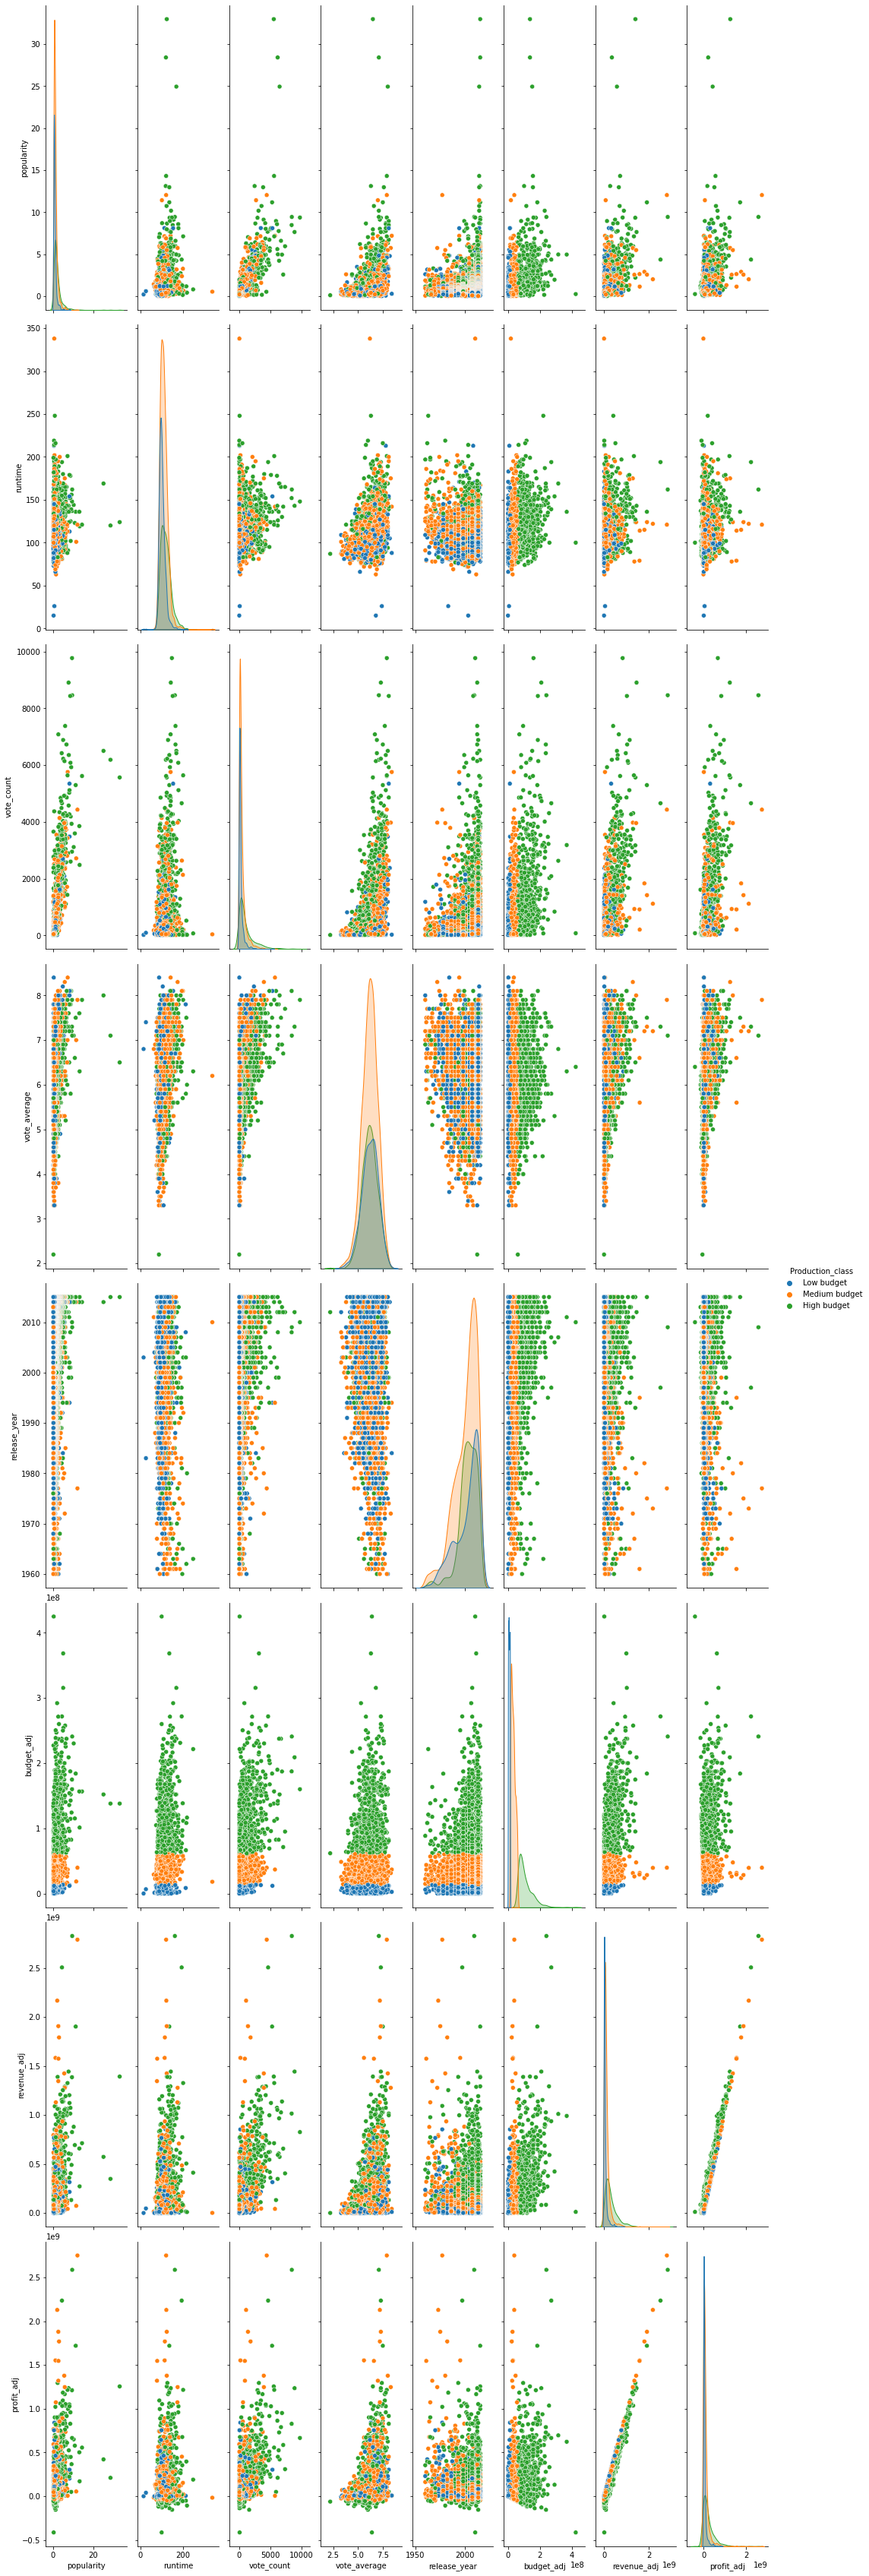

In [24]:
sns.pairplot(df,hue='Production_class',height=6,aspect=0.3);

### Research Question 1  
>Which movie genres are more profitable? 

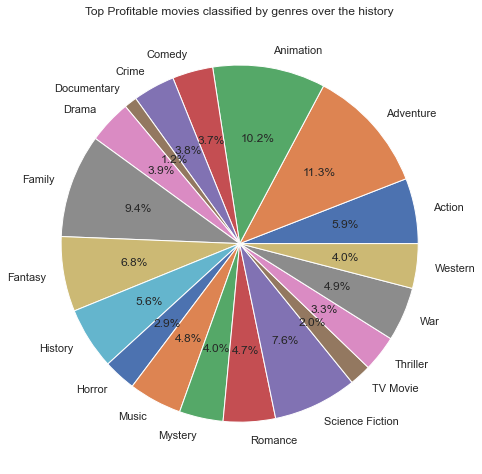

In [35]:
df_most_profit= df.query('profit_adj>0').sort_values(by=['profit_adj'],ascending=False)
df_most_profit.groupby(['genres'])['profit_adj'].mean().plot.pie(y='profit_adj',figsize=(8,10),autopct='%1.1f%%');
plt.title("Top Profitable movies classified by genres over the history");
plt.ylabel('');

* Adventure, Animation, and family movies were the most profitable movie genres over the history.

* Although this results maybe misleading as the total number of movies produced for each genres will affect the average profit for each genre.
> It is better to check this method for the top 100 most profitalble movies

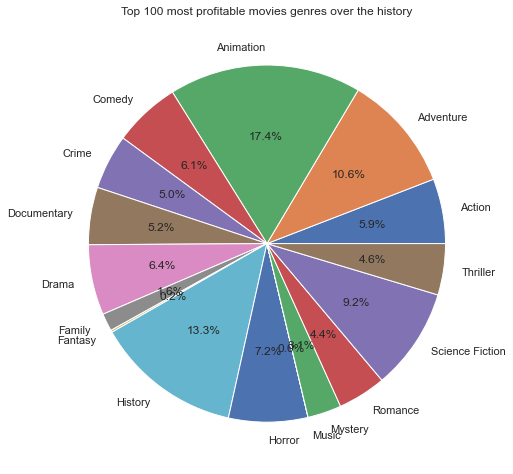

In [36]:
df_most_profit_100= df.query('profit_adj>0').sort_values(by=['profit_adj']).head(100)
df_most_profit_100.groupby(['genres'])['profit_adj'].mean().plot.pie(y='profit_adj',figsize=(8,10),autopct='%1.1f%%');
plt.title("Top 100 most profitable movies genres over the history");
plt.ylabel('');

* Animation and History movies were the most profitable movie genres.


### Research Question 2  
> How is the production rate for the low, medium and high budget movies over the years? 

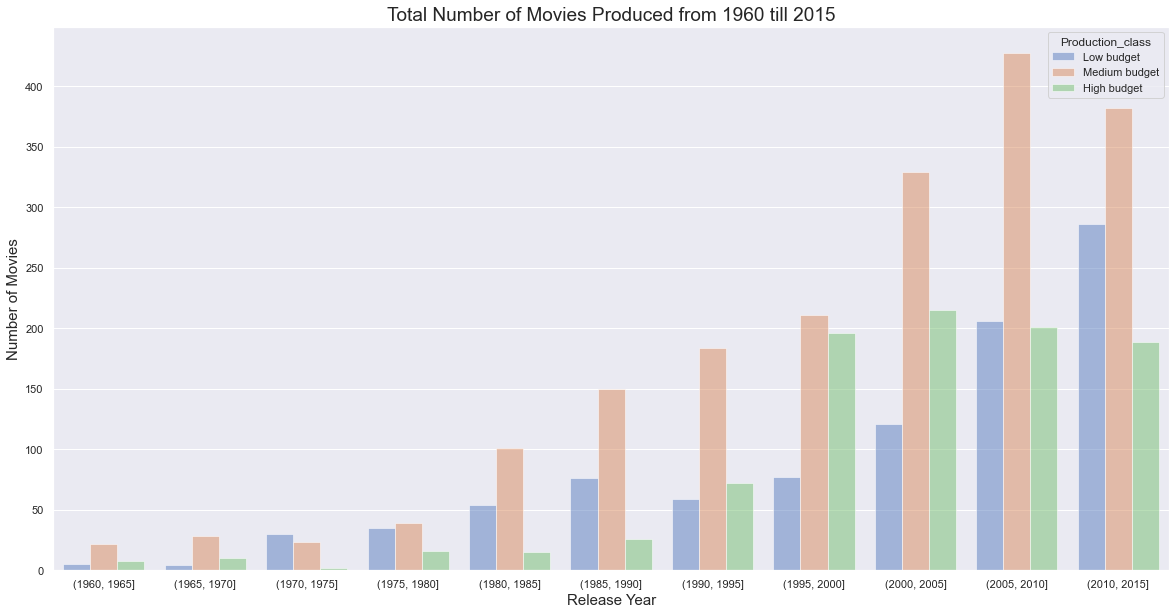

In [37]:
q2=sns.countplot(x=pd.cut(df['release_year'],np.arange(1960,2016,5)), hue='Production_class',
            alpha=.5, palette="muted",data=df);
sns.set(rc={'figure.figsize':(15,15)});
q2.set_title("Total Number of Movies Produced from 1960 till 2015",fontsize=19,loc='center');
q2.set_xlabel("Release Year",fontsize=15);
q2.set_ylabel("Number of Movies",fontsize=15);

* The total number of produced movies increased in general over the years.
* The number of high budget movies strikes from the year 1995 until 2005.
* From the year 2010, low budget movies increased significtly. on the other hand, the medium and high budget movies declined.

### Research Question 3 
>Which Production companies have prdoduced the most profitable movies? 

In [39]:
df_most_profit['production_companies']=df_most_profit['production_companies'].apply(lambda x:x.split('|')[0])

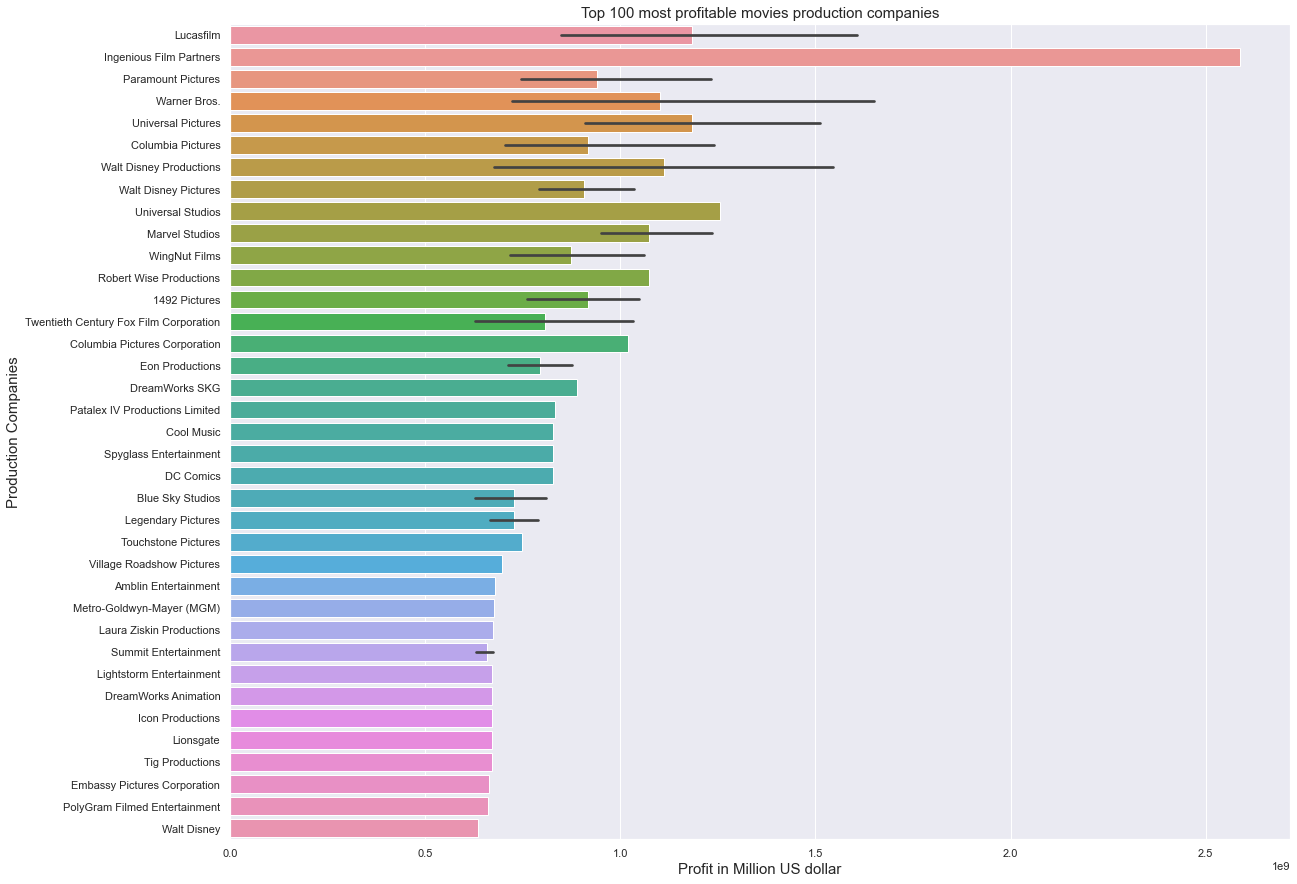

In [40]:
q3= sns.barplot(x='profit_adj', y='production_companies', data=df_most_profit.head(100)) 
sns.set(rc={'figure.figsize':(19,15)});
q3.set_title("Top 100 most profitable movies production companies",fontsize=15,loc='center');
q3.set_xlabel("Profit in Million US dollar",fontsize=15);
q3.set_ylabel("Production Companies",fontsize=15);

* The Most profitable movies production companies; Ingenious Film partners, Universal studios, and Universal Pictures.

### Research Question 4
> Are the most profitable movies has same charactaristics of popularlity and ratings compared to the highst revenue?

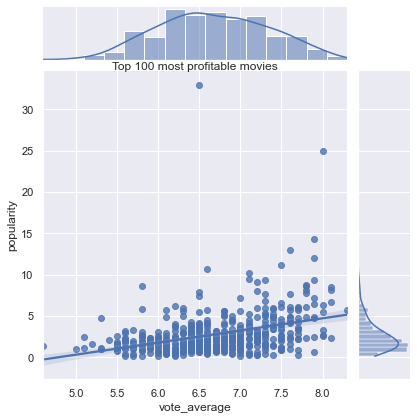

In [30]:
sns.jointplot(y='popularity',x='vote_average',data=df_most_profit.head(500),kind='reg');
plt.title('Top 100 most profitable movies',loc='center',pad=1.5);

* Top 500 profitable movies has average ratings around 6.5
* Despite all these movies made higher profits, its popularity are really low around 0.6. 

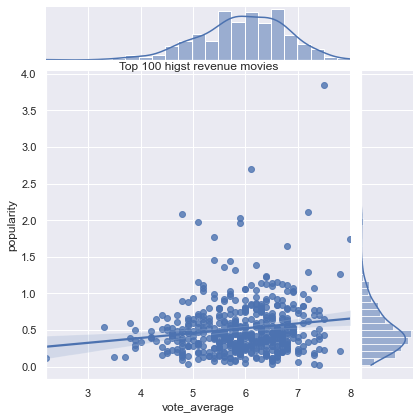

In [31]:
sns.jointplot(y='popularity',x='vote_average',data=df.sort_values(by=['revenue_adj']).head(500),kind='reg');
plt.title('Top 100 higst revenue movies',loc='center',pad=1.5);

* Top 500 highst revenue movies has lower average ratings around 5.5
* Its popularity are same around 0.6
* We can conclude that highst profit/revenue movies has same charactaristics in terms of its popularity and ratings. 

### Research Question 4
> What is the best release month for most profitable movies?

In [32]:
df_most_profit['month']=df_most_profit['release_date'].dt.month_name()

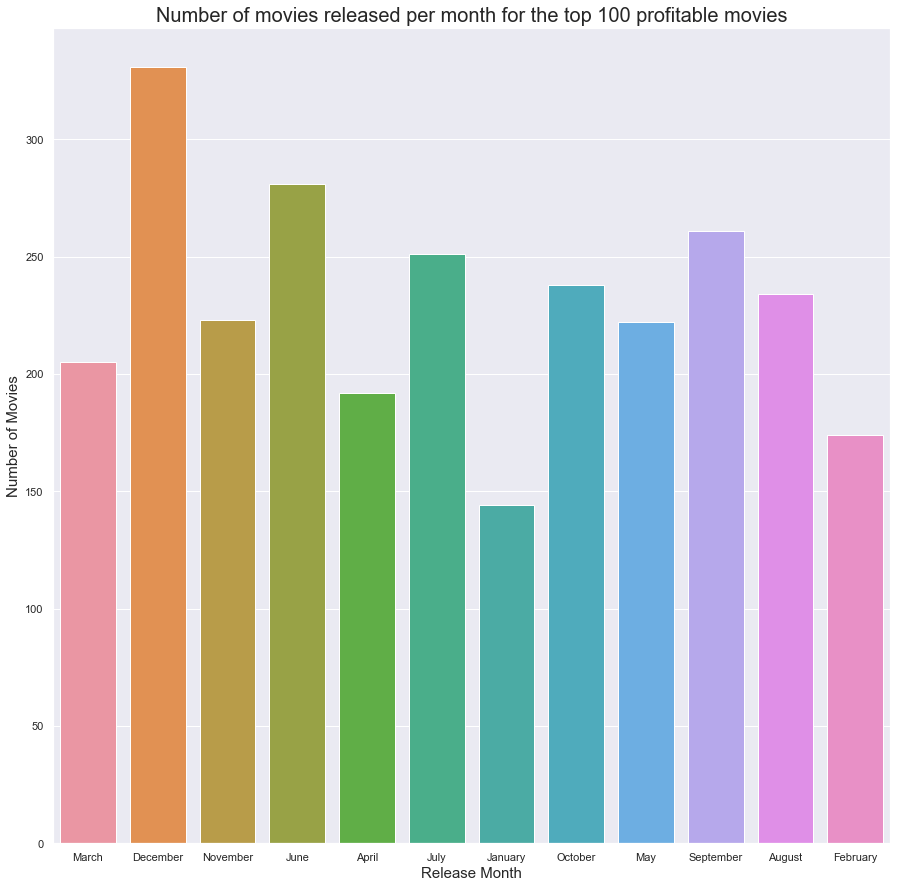

In [33]:
q4 =sns.countplot(x=df_most_profit['month'],data=df_most_profit.head(100))
q4.set_title('Number of movies released per month for the top 100 profitable movies',fontsize=20);
sns.set(rc={'figure.figsize':(10,10)});
q4.set_ylabel('Number of Movies',fontsize=15);
q4.set_xlabel('Release Month',fontsize=15);

* The most profitable movies were released in December as it is the start of the chrismas holiday. 
* The second best release month was June as it is the start of the summer vacation. 

### Research Question 5  
> Which movie era had the highst average ratings? 

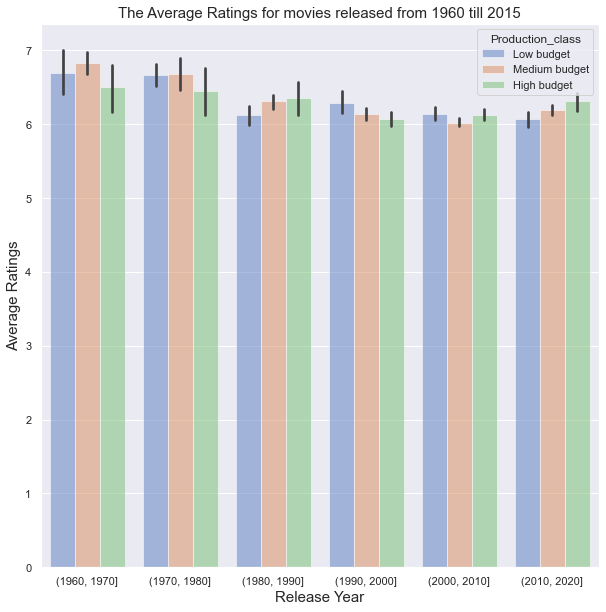

In [34]:
q5=sns.barplot(x=pd.cut(df['release_year'],np.arange(1960,2021,10)), y='vote_average', hue='Production_class',
            alpha=.5, palette="muted",data=df);
sns.set(rc={'figure.figsize':(20,10)});
q5.set_title("The Average Ratings for movies released from 1960 till 2015",fontsize=15,loc='center');
q5.set_ylabel("Average Ratings",fontsize=15);
q5.set_xlabel("Release Year",fontsize=15);

* The best era for highest average ratings movies were in the 1960s and 1970s.  

<a id='conclusions'></a>
## Conclusions

>  Our analysis insights:
1. Animation and History movies are the most profitable movie genres over the history.
2. The Most profitable movies production companies; Ingenious Film partners, Universal studios, and Universal Pictures.
3. For the top 500 profitable movies, the average movies ratings are around 6.5.
4. for the top 500 highst revenue movies has lower average ratings around 5.5.
5. The best release month is December as it is the start of the chrismas holiday. 
6. The second best release month is June as it is the start of the summer vacation. 
7. The best era for highest average ratings movies were in the 1960s and 1970s.

>  Our analysis limitations:
1. Desipite that the time value of budget, and revenue was adjusted based on the year 2010, its not valid to evaluate the recent releases.
2. Many movies has missing data.
3. Genre classification was based on the first genre tag of this data set which is not always accurate. 
4. All results are limited as no advaned statistics were performed, these insights can only be treated as indicators 